In [1]:
pip install colorspacious

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load an RGB image using OpenCV
img_rgb = cv2.imread('D:/RESEARCH/CONFERENCE/ICDAM_SPIE2023/IMAGES/histnewImage.jpg')  # Replace 'input_image.jpg' with your image filename

In [10]:
# Convert RGB to CIELab
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2Lab)

In [11]:
# Split Lab channels
L, a, b = cv2.split(img_lab)

In [12]:
# Calculate LCH values
C = np.sqrt(a ** 2 + b ** 2)
H = np.arctan2(b, a)

In [13]:
# Convert back to BGR for display and save
img_lch = cv2.merge((L, C, H))
img_lch_bgr = cv2.cvtColor(img_lch, cv2.COLOR_Lab2BGR)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'merge'
> Overload resolution failed:
>  - Can't parse 'mv'. Sequence item with index 1 has a wrong type
>  - Can't parse 'mv'. Sequence item with index 1 has a wrong type


In [14]:
# Display the original RGB image and the converted LCH image
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Original RGB Image')

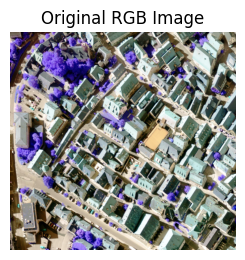

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original RGB Image')


NameError: name 'img_lch_bgr' is not defined

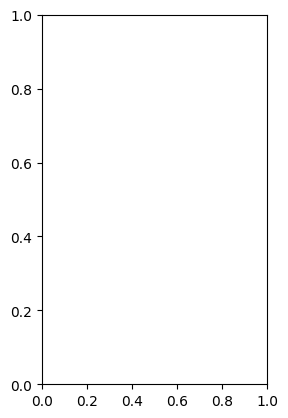

In [16]:
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_lch_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Converted LCH Image')

plt.tight_layout()

In [17]:
pip install colormath

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39408 sha256=ffa09eff9516e0019c49a609b89403677da73d95d4033b1a05e61de9723befc0
  Stored in directory: c:\users\dolonchapa\appdata\local\pip\cache\wheels\ab\b3\4d\c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import cv2
import numpy as np
from colormath.color_objects import LabColor, LCHabColor
from colormath.color_conversions import convert_color
import matplotlib.pyplot as plt

In [19]:
# Load an RGB image using OpenCV
img_rgb = cv2.imread('D:/RESEARCH/CONFERENCE/ICDAM_SPIE2023/IMAGES/histnewImage.jpg')  # Replace 'input_image.jpg' with your image filename

In [20]:
# Convert RGB to Lab
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2Lab)


In [21]:
# Split Lab channels
L, a, b = cv2.split(img_lab)

In [22]:
# Calculate LCH values
C = np.sqrt(a ** 2 + b ** 2)
H = np.arctan2(b, a) * (180 / np.pi)  # Convert radians to degrees

In [23]:
# Create LCH color objects
lch_colors = [LCHabColor(l, c, h) for l, c, h in zip(L.flat, C.flat, H.flat)]

In [24]:
# Convert LCH color objects to Lab
lab_colors = [convert_color(lch_color, LabColor) for lch_color in lch_colors]

In [26]:
# Reshape Lab colors to match the original image dimensions
img_lch_lab = np.array(lab_colors).reshape(img_lab.shape)

ValueError: cannot reshape array of size 7001892 into shape (2601,2692,3)

In [ ]:
# Convert Lab to BGR for display and saving
img_lch_bgr = cv2.cvtColor(img_lch_lab, cv2.COLOR_Lab2BGR)

In [ ]:
# Display the original RGB image and the converted LCH image
plt.figure(figsize=(12, 6))

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original RGB Image')

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_lch_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Converted LCH Image')

plt.tight_layout()


# Save the original RGB image and the converted LCH image using OpenCV
cv2.imwrite('original_rgb.jpg', img_rgb)
cv2.imwrite('converted_lch.jpg', img_lch_bgr)

plt.show()

### Actual code for LAB to LCH 

In [27]:
import cv2
import os

In [28]:
img = cv2.imread('D:/RESEARCH/CONFERENCE/ICDAM_SPIE2023/IMAGES/CIELab.jpg')

In [29]:
cv2.imshow("Original", img)

cv2.waitKey(0)

-1

In [30]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

In [32]:
cv2.imshow("CIELCH image", gray_img)
cv2.imwrite('D:/RESEARCH/CONFERENCE/ICDAM_SPIE2023/IMAGES/LAB2CIELch.jpg', gray_img)

cv2.waitKey(0)
cv2.destroyAllWindows()